In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Wed, 23 Aug 2023 13:17


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"32,512,398","33,635,179","1,122,781",3.45%
Arterial,"26,415,517","25,614,393","-801,124",-3.03%
Collector,"4,607,593","3,716,400","-891,193",-19.34%
Ramp,"2,593,779","2,436,226","-157,553",-6.07%
Total,"66,129,287","65,402,198","-727,089",-1.10%


#### Daily | By Facility Type - Pierce County

In [6]:
df1 = df[df['county'] == 'Pierce']

In [7]:
_df = df1.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"10,007,000","10,378,835","371,835",3.72%
Arterial,"7,844,186","8,113,670","269,484",3.44%
Collector,"1,071,045","905,390","-165,655",-15.47%
Ramp,"2,065,760","1,988,423","-77,337",-3.74%
Total,"20,987,991","21,386,318","398,327",1.90%


#### Daily | By Facility Type - Other Counties

In [8]:
df2 = df[df['county'] != 'Pierce']

In [9]:
_df = df2.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"22,505,398","23,256,344","750,946",3.34%
Arterial,"18,571,331","17,500,723","-1,070,608",-5.76%
Collector,"3,536,548","2,811,010","-725,538",-20.52%
Ramp,"528,019","447,803","-80,216",-15.19%
Total,"45,141,296","44,015,880","-1,125,416",-2.49%


----
### Daily | By County

In [10]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"31,199,530","31,172,628","-26,902",-0.09%
Kitsap,"4,557,863","3,916,476","-641,387",-14.07%
Pierce,"20,987,991","21,386,318","398,327",1.90%
Snohomish,"9,383,903","8,926,776","-457,127",-4.87%
Total,"66,129,287","65,402,198","-727,089",-1.10%


----
### Daily | Scatterplots 

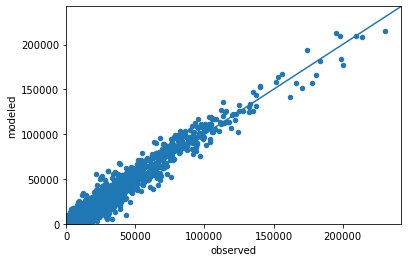

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9760481234579924


---
By County

King r^2: 0.973898929783532
Kitsap r^2: 0.9521646711282392


Pierce r^2: 0.9861224881269659


Snohomish r^2: 0.9414101246393568


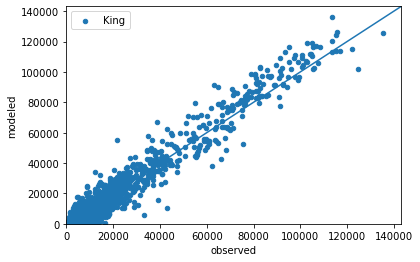

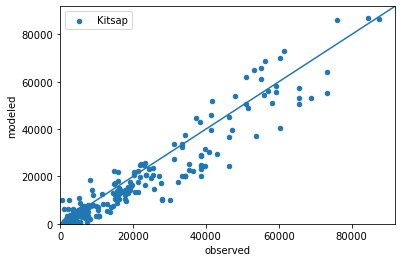

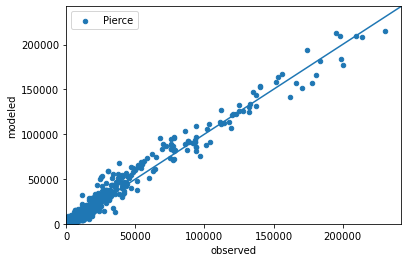

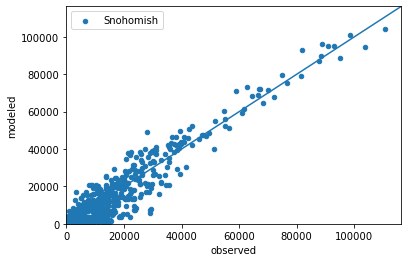

In [13]:
for county in np.unique(df[~df.county.isna()]['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9674913823371314
r^2 Arterial: 0.8843545562129289


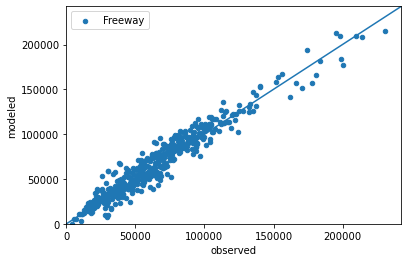

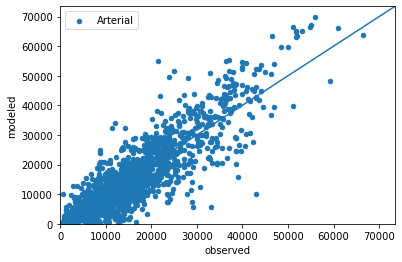

In [14]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - Pierce County

r^2 Freeway: 0.9702334412257798
r^2 Arterial: 0.9518790342634716


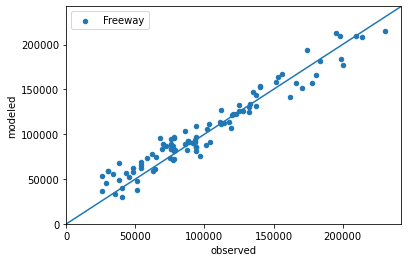

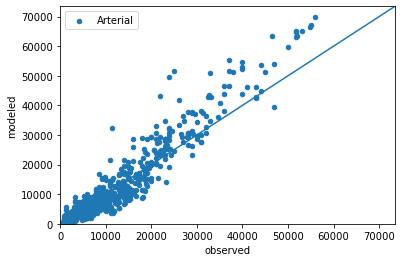

In [15]:
df1 = df[df['county'] == 'Pierce']
for factype in ['Freeway','Arterial']:
    _df = df1[df1['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - Other Counties

r^2 Freeway: 0.9562607916191869
r^2 Arterial: 0.8422137924520072


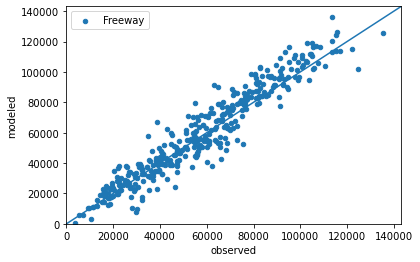

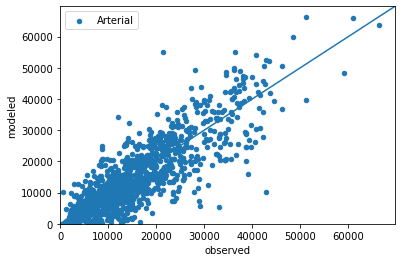

In [16]:
df2 = df[(df['county'] != 'Pierce') & (~df.county.isna())]
if df2.shape[0] > 0:
    for factype in ['Freeway','Arterial']:
        _df = df2[df2['@facilitytype'] == factype]
        ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
        lim = _df[['observed','modeled']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
        print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.9575635445335218


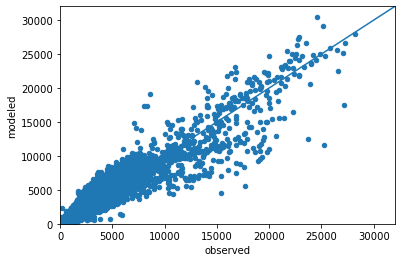

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - Pierce County**

r^2: 0.9221595039722034


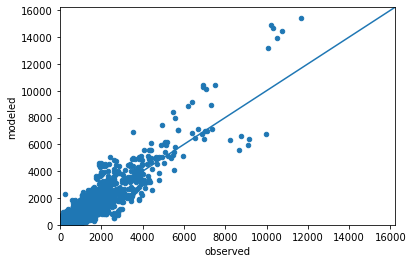

In [18]:
df1 = df[df['county'] == 'Pierce']
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df1[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - Other Counties**

r^2: 0.9312477677175064


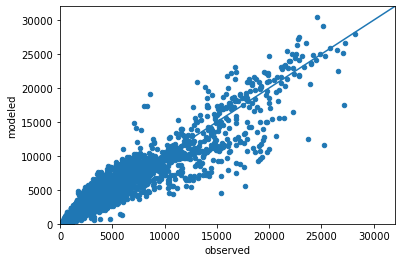

In [19]:
df2 = df[df['county'] != 'Pierce']
ax = df2.plot(kind='scatter', x='observed', y='modeled')
lim = df2[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [20]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","560,149",King,"-8,268",-1.45%
1,KENT,"550,322","531,851",King,"-18,471",-3.36%
2,SEATTLE - SOUTH OF CBD,"526,500","544,995",King,"18,495",3.51%
3,SHIP CANAL,"519,802","572,943",King,"53,141",10.22%
4,NS-02,"517,266","523,465",Pierce,"6,199",1.20%
5,KIRKLAND-REDMOND,"414,120","421,504",King,"7,384",1.78%
6,MILL CREEK,"400,848","399,949",King,-899,-0.22%
7,SOUTH BELLEVUE,"399,500","386,842",King,"-12,658",-3.17%
8,EW-05,"376,912","369,724",Pierce,"-7,188",-1.91%
9,SEATTLE - NORTH,"372,000","397,882",King,"25,882",6.96%


r^2 : 0.9942635983108012


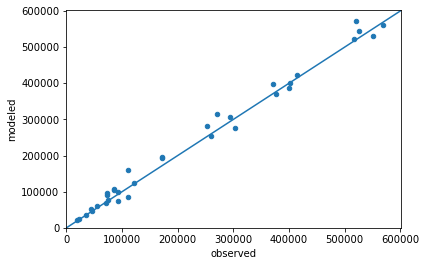

In [21]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - Pierce County

In [22]:
df1 = df[df['county'] == 'Pierce']
df1 = df1.append(df1.sum(numeric_only=True), ignore_index=True)
df1.at[df1.index[-1], 'name'] = 'TOTAL'
#df1.at['C', 'name'] = 10
df1['percent_diff'] = df1['diff']/df1['observed']
df1[['percent_diff']] = df1[['percent_diff']].applymap(format_percent)
df1

,name,observed,modeled,county,diff,percent_diff
0,NS-02,"517,266","523,465",Pierce,"6,199",1.20%
1,EW-05,"376,912","369,724",Pierce,"-7,188",-1.91%
2,EW-04,"302,884","276,683",Pierce,"-26,201",-8.65%
3,EW-06,"172,178","194,296",Pierce,"22,118",12.85%
4,EW-03,"170,814","196,075",Pierce,"25,261",14.79%
5,EW-08,"120,500","122,959",Pierce,"2,459",2.04%
6,NS-03,"91,908","74,699",Pierce,"-17,209",-18.72%
7,EW-02,"86,000","103,795",Pierce,"17,795",20.69%
8,NS-05,"85,764","106,811",Pierce,"21,047",24.54%
9,EW-01,"72,780","95,770",Pierce,"22,990",31.59%


r^2 : 0.9944127685110755


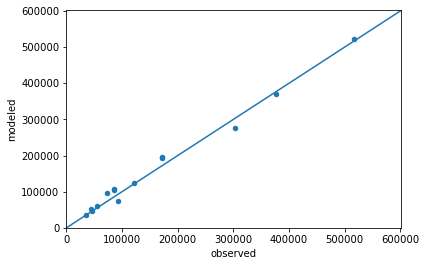

In [23]:
df1 = df1.head(-1)
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - Other Counties

In [24]:
df2 = df[df['county'] != 'Pierce']
df2 = df2.append(df2.sum(numeric_only=True), ignore_index=True)
df2.at[df2.index[-1], 'name'] = 'TOTAL'
#df2.at['C', 'name'] = 10
df2['percent_diff'] = df2['diff']/df2['observed']
df2[['percent_diff']] = df2[['percent_diff']].applymap(format_percent)
df2

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","560,149",King,"-8,268",-1.45%
1,KENT,"550,322","531,851",King,"-18,471",-3.36%
2,SEATTLE - SOUTH OF CBD,"526,500","544,995",King,"18,495",3.51%
3,SHIP CANAL,"519,802","572,943",King,"53,141",10.22%
4,KIRKLAND-REDMOND,"414,120","421,504",King,"7,384",1.78%
5,MILL CREEK,"400,848","399,949",King,-899,-0.22%
6,SOUTH BELLEVUE,"399,500","386,842",King,"-12,658",-3.17%
7,SEATTLE - NORTH,"372,000","397,882",King,"25,882",6.96%
8,BOTHELL,"293,729","307,321",King,"13,592",4.63%
9,LYNNWOOD-BOTHELL,"269,900","314,268",King,"44,368",16.44%


r^2 : 0.9935176306306086


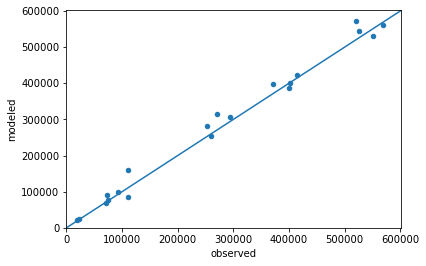

In [25]:
df2 = df2.head(-1)
if df2.shape[0] > 0:
    ax = df2.plot(kind='scatter', x='observed', y='modeled')
    lim = df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
    print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
sorted_values = df.sort_values('observed_5to20', ascending=False).agency.to_list() + ['TOTAL']
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'agency'] = 'TOTAL'
df[['perc_diff']] = df['diff']/df['observed_5to20']
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.set_index('agency').reindex(sorted_values)

,county,observed_5to20,modeled_5to20,diff,perc_diff
agency,,,,,
King County Metro,NaN,"392,694","331,024","-61,671",-15.70%
Sound Transit,NaN,"145,426","137,712","-7,714",-5.30%
Community Transit,NaN,"30,918","31,305",387,1.25%
Pierce Transit,Pierce,"27,233","26,297",-936,-3.44%
Washington Ferries,NaN,"16,912","7,974","-8,937",-52.85%
Kitsap Transit,NaN,"8,669","10,273","1,604",18.50%
Everett Transit,NaN,"3,290","1,794","-1,496",-45.47%
TOTAL,NaN,"625,142","546,380","-78,763",-12.60%


### By Route for PierceTransit

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_route.csv')
df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df.drop(columns=['county'],inplace=True)
df_piercetransit = df[df.agency=='Pierce Transit'].copy()
df_piercetransit = df_piercetransit.sort_values('observed_5to20', ascending=False)
df_piercetransit['route_code'] = df_piercetransit['route_code']-2000
df_piercetransit = df_piercetransit.append(df_piercetransit.sum(numeric_only=True), ignore_index=True)
df_piercetransit.at[df_piercetransit.index[-1], 'agency'] = 'TOTAL'
df_piercetransit.at[df_piercetransit.index[-1], 'route_code'] = 0
df_piercetransit.at[df_piercetransit.index[-1], 'description'] = 'TOTAL'
df_piercetransit[['perc_diff']] = (df_piercetransit['diff']/df_piercetransit['observed_5to20']).values
df_piercetransit[['perc_diff']] = df_piercetransit[['perc_diff']].applymap(format_percent)
df_piercetransit

,agency,route_code,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Pierce Transit,1,1 6th Ave / Pacific,"4,975","4,789",-185,-3.73%
1,Pierce Transit,2,2 Bridgeport / S 19t,"2,330","1,586",-744,-31.94%
2,Pierce Transit,3,3 South Tacoma Way,"1,598","1,902",304,19.04%
3,Pierce Transit,4,4 S 112th St,"1,273","1,489",216,16.98%
4,Pierce Transit,48,48 Sheridan/M st,"1,174",603,-571,-48.64%
5,Pierce Transit,500,500 Federal Way,"1,138","2,201","1,062",93.34%
6,Pierce Transit,402,402 Meridian/Federal,"1,124","2,699","1,575",140.23%
7,Pierce Transit,41,41 56th St/Salishan,"1,039","1,109",71,6.81%
8,Pierce Transit,57,57 Tacoma Mall,"1,018",367,-652,-64.01%
9,Pierce Transit,202,202 72nd Street,"1,007",284,-723,-71.77%


----
### Key Routes
#### Ferries

In [28]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
sorted_values = _df.sort_values('observed_5to20', ascending=False).description.to_list() + ['TOTAL']
_df = _df.append(_df.sum(numeric_only=True), ignore_index=True)
_df.at[_df.index[-1], 'description'] = 'TOTAL'
_df[['perc_diff']] = _df['diff']/_df['observed_5to20']
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
0,POF Seattle - West S,NaN,"1,356",409,-947,-69.82%
1,POF Seattle - Vashon,NaN,670,474,-195,-29.19%
2,WSF Kingston - Edmon,NaN,"1,732",246,"-1,486",-85.78%
3,WSF Bainbridge Islan,NaN,"8,857","5,361","-3,495",-39.47%
4,WSF Bremerton - Seat,NaN,"4,484",933,"-3,552",-79.20%
5,WSF Fauntleroy - Sou,NaN,365,13,-352,-96.44%
6,WSF Vashon Island -,NaN,946,"1,100",154,16.31%
7,WSF Southworth - Vas,NaN,239,153,-86,-35.90%
8,WSF Point Defiance -,NaN,289,167,-121,-41.96%
9,TOTAL,0,"18,937","8,857","-10,080",-53.23%


r^2 : 0.976643069314476


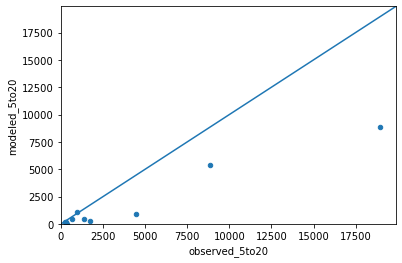

In [29]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [30]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
0,1973,POF West Seattle - S,546
1,1975,POF Vashon Island -,381
2,4200,POF Seattle - Bremer,364
4,4202,POF Bremerton - Anna,361
3,4201,POF Bremerton - Pt O,360
7,5003,WSF Bremerton - Seat,240
8,5005,WSF Vashon Island -,98
10,5007,WSF Point Defiance -,85
9,5006,WSF Southworth - Vas,75
6,5002,WSF Bainbridge Islan,53


#### Rail

In [31]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,NaN,"69,383","57,480","-11,903",-17.16%
1,Sounder South,NaN,"15,356","14,252","-1,104",-7.19%
2,Sounder North,NaN,"1,667","1,980",313,18.81%


r^2 : 0.9998058616419873


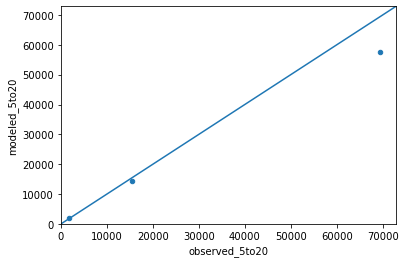

In [32]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [33]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,NaN,"15,336","11,631","-3,705",-24.16%
4,C Line RapidRide,NaN,"11,368","10,434",-934,-8.21%
1,KC Metro 40,NaN,"11,405","10,309","-1,096",-9.61%
10,Sound Transit 550,NaN,"9,168","8,912",-256,-2.79%
2,A Line RapidRide,NaN,"8,522","8,106",-416,-4.89%
0,KC Metro 7,NaN,"10,150","7,910","-2,240",-22.07%
5,D Line RapidRide,NaN,"13,078","7,646","-5,432",-41.53%
3,B Line RapidRide,NaN,"5,914","5,473",-441,-7.45%
7,F Line RapidRide,NaN,"5,267","5,247",-20,-0.39%
8,SLU Streetcar,NaN,"1,703","1,365",-339,-19.89%


r^2 : 0.9119976652247079


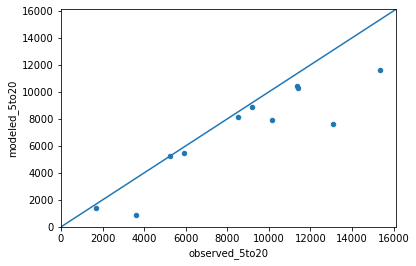

In [34]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.8482300610227325


r^2 Everett Transit: -0.34357667149734594
r^2 King County Metro: 0.9148889467868159
r^2 Kitsap Transit: 0.795944154751467
r^2 Pierce Transit: 0.8322699172425403
r^2 Sound Transit: 0.9951301120733962


r^2 Washington Ferries: 0.9235915925788809


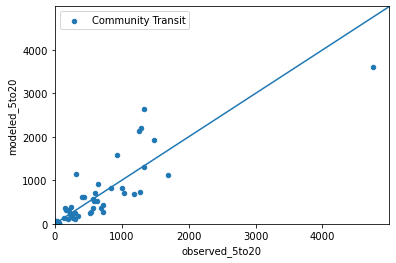

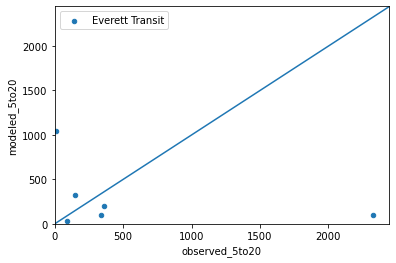

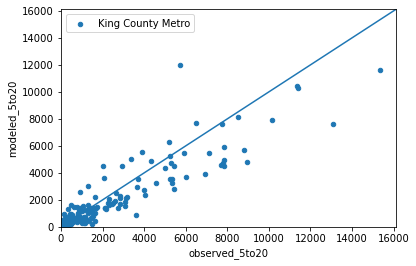

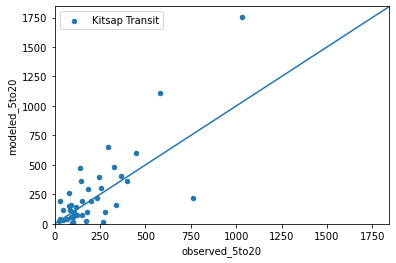

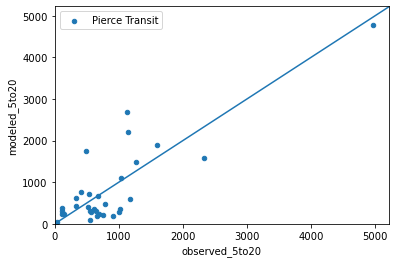

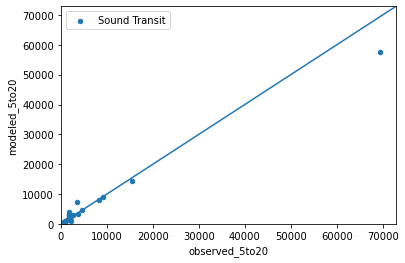

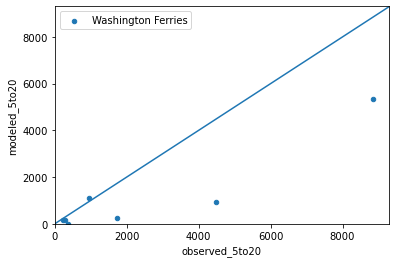

In [35]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
        lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [36]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,county,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,,
Husky Stadium,NaN,"9,416","7,423","-1,993",-21.17%
Westlake,NaN,"10,904","7,742","-3,162",-29.00%
University St,NaN,"5,257","4,773",-484,-9.21%
Pioneer Square,NaN,"3,865","5,503","1,638",42.38%
Int'l District,NaN,"5,647","3,139","-2,508",-44.41%
Capitol Hill,NaN,"7,016","5,598","-1,418",-20.21%
Stadium,NaN,"1,912",723,"-1,189",-62.19%
SODO,NaN,"2,108","3,606","1,499",71.11%
Beacon Hill,Pierce,"2,587","1,343","-1,244",-48.09%


Sound Transit Station Groupings

In [37]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","7,423","-1,993",-21.17%
Capitol Hill,"7,016","5,598","-1,418",-20.21%
Westlake/University St,"16,161","12,515","-3,646",-22.56%
Pioneer Square/Int'l District,"9,512","8,642",-870,-9.15%
Stadium/SODO,"4,020","4,329",309,7.70%
Beacon Hill/Mount Baker,"4,809","2,893","-1,916",-39.85%
Columbia City,"2,376","1,596",-780,-32.85%
Othello/Rainier Beach,"4,412","2,733","-1,679",-38.05%
Tukwila Int'l Blvd,"2,779","3,632",853,30.68%


# Stop Transfers

### Light Rail

In [38]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,county,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,,
Husky Stadium,NaN,0.40,-99.00,99.40,-100.40%
Westlake,NaN,0.41,0.36,0.05,13.01%
University St,NaN,0.46,0.20,0.26,128.57%
Pioneer Square,NaN,0.53,0.16,0.37,233.18%
Int'l District,NaN,0.72,0.45,0.27,60.26%
Capitol Hill,NaN,0.06,-99.00,99.06,-100.06%
Stadium,NaN,0.28,0.12,0.16,134.56%
SODO,NaN,0.40,0.31,0.09,27.65%
Beacon Hill,Pierce,0.39,0.35,0.04,11.13%


# Externals

In [39]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","122,959","-7,041",-5.42%
I-5 to Mount Vernon,3744,Snohomish,"67,000","52,798","-14,202",-21.20%
I-90 @ Snoqualmie Pass,3739,King,"33,000","26,371","-6,629",-20.09%
SR-532 to Camano Island,3746,Snohomish,"23,000","19,126","-3,874",-16.84%
SR-507 to Yelm,3734,Pierce,"23,000","18,319","-4,681",-20.35%
SR-3 to Belfair,3749,Kitsap,"18,000","15,101","-2,899",-16.11%
Hood Canal Bridge,3748,Kitsap,"18,000","15,163","-2,837",-15.76%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","7,971","-1,129",-12.40%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","5,497",-803,-12.74%


#### Externals - Pierce County

In [40]:
df1 = df[df['county'] == 'Pierce']
pd.options.display.float_format = '{:0,.0f}'.format
df1 = df1.drop('diff', axis=1)
df1['diff'] = df1['modeled']-df1['observed']
df1 = df1.fillna(0)
df1.loc['Total',['observed','modeled','diff']] = df1[['observed','modeled','diff']].sum()
df1['percent_diff'] = df1['diff']/df1['observed']
df1[['percent_diff']] = df1[['percent_diff']].applymap(format_percent)

#df1[['external_station']] = df1[['external_station']].applymap('{:0.0f}'.format)
df1.replace('nan', '', regex=True)

,external_station,county,observed,modeled,percent_diff,diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","122,959",-5.42%,"-7,041"
SR-507 to Yelm,3734,Pierce,"23,000","18,319",-20.35%,"-4,681"
SR-302 to Shelton,3750,Pierce,"4,100","3,955",-3.53%,-145
SR-7 to Morton,3735,Pierce,"2,700","1,983",-26.56%,-717
SR-706 to Longmire,3736,Pierce,"1,800","1,791",-0.47%,-9
SR-123 S/O Cayuse Pass,3737,Pierce,"1,100",526,-52.18%,-574
SR 410 E/O Cayuse Pass,3738,Pierce,960,531,-44.67%,-429
Total,NaN,NaN,"163,660","150,065",-8.31%,"-13,595"


#### Externals - Other Counties

In [41]:
df2 = df[df['county'].isin(['Snohomish', 'Kitsap', 'King'])]
pd.options.display.float_format = '{:0,.0f}'.format
df2 = df2.drop('diff', axis=1)
df2['diff'] = df2['modeled']-df2['observed']
df2 = df2.fillna(0)
df2.loc['Total',['observed','modeled','diff']] = df2[['observed','modeled','diff']].sum()
df2['percent_diff'] = df2['diff']/df2['observed']
df2[['percent_diff']] = df2[['percent_diff']].applymap(format_percent)

#df2[['external_station']] = df2[['external_station']].applymap('{:0.0f}'.format)
df2.replace('nan', '', regex=True)

,external_station,county,observed,modeled,percent_diff,diff
location,,,,,,
I-5 to Mount Vernon,3744,Snohomish,"67,000","52,798",-21.20%,"-14,202"
I-90 @ Snoqualmie Pass,3739,King,"33,000","26,371",-20.09%,"-6,629"
SR-532 to Camano Island,3746,Snohomish,"23,000","19,126",-16.84%,"-3,874"
SR-3 to Belfair,3749,Kitsap,"18,000","15,101",-16.11%,"-2,899"
Hood Canal Bridge,3748,Kitsap,"18,000","15,163",-15.76%,"-2,837"
SR-530 N/O Stanwood,3745,Snohomish,"9,100","7,971",-12.40%,"-1,129"
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","5,497",-12.74%,-803
SR-2 @ Stevens Pass,3740,King,"5,600","2,906",-48.11%,"-2,694"
SR-530 N/O Darrington,3742,Snohomish,"1,600","1,063",-33.54%,-537


# Corridor Speed

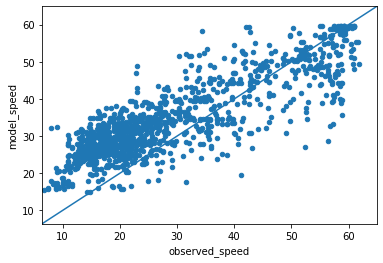

In [42]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
ax = df.plot(kind='scatter', y='model_speed', x='observed_speed')
maxlim = df[['observed_speed','model_speed']].max().max()*1.05
minlim = df[['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

## Pierce County

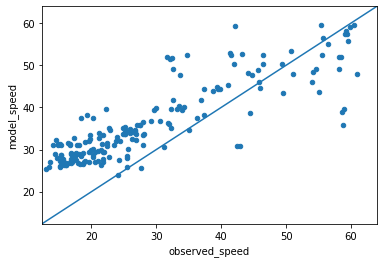

In [43]:
ax = df.loc[df.county=='Pierce'].plot(kind='scatter', y='model_speed', x='observed_speed')
maxlim = df.loc[df.county=='Pierce'][['observed_speed','model_speed']].max().max()*1.05
minlim = df.loc[df.county=='Pierce'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

## Other Counties

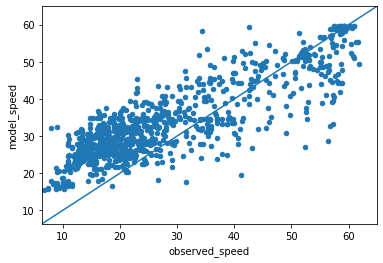

In [44]:
_df = df.loc[df.county!='Pierce']
_df = _df.groupby(['Corridor_Number', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda xdf: xdf.length*60/xdf.auto_time)
ax = _df.plot(kind='scatter', y='model_speed', x='observed_speed')
maxlim = _df[['observed_speed','model_speed']].max().max()*1.05
minlim = _df[['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

### AM Peak, Primary Corridors

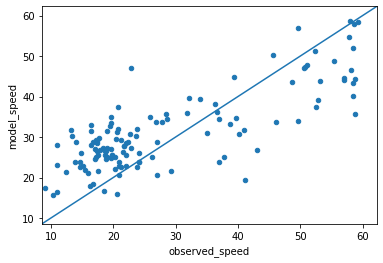

In [45]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
ax = df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [46]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
337,"SR 522, SR 2 to I-405 - WB",47,23
67,Seattle to Tacoma - SB,36,59
384,"SR 3/SR 16, SR 160 to Loxie Eagans - NB",19,41
726,"Delridge Way, 16th Ave SW to West Seattle Fwy ...",32,13
12,Seattle to Everett - NB,40,58
780,"Silverdale Way, Newberry Hill Rd to SR 303 - NB",28,11
663,"Bel-Red Road, 124th Ave NE to West Lk Samm - EB",30,13
1041,"SR 99, SR 518 to S 320th St - SB",37,21
645,"Airport Road/128th/132nd, Casino Rd to Seattle...",33,16
123,Bellevue to Tukwila - SB,27,43


## Pierce County

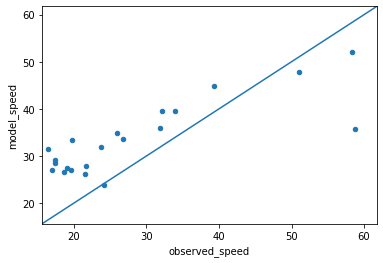

In [47]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county=='Pierce']
ax = df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [48]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
67,Seattle to Tacoma - SB,36,59
897,"56th Street/Cirque, Bridgeport to Alaska - EB",31,16
951,"Canyon Road, 72nd to 176th - SB",33,20
969,"Pearl Street, N 51st St to EB SR 16 ramps - SB",29,17
915,"74th/72nd/Pioneer, Meridian to Lakewood - WB",29,17
888,"56th Street/Cirque, Alaska to Bridgeport - WB",27,17
933,"176th Street, Spanaway Loop Rd to Meridian - EB",35,26
553,"SR 161, SR 18 to 264th St - SB",27,19
978,"Wollochet Drive, 40th St NW to SR 16 NB Off-ra...",32,24
906,"19th Street, Bridgeport to Jefferson - EB",27,19


## Other Counties

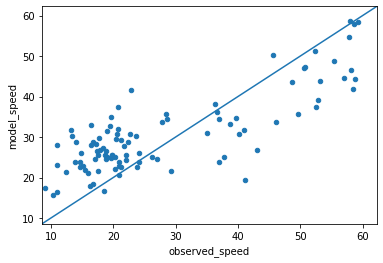

In [49]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county!='Pierce']
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
ax = df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [50]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
276,"SR 3/SR 16, SR 160 to Loxie Eagans - NB",19,41
240,"SR 522, SR 2 to I-405 - WB",42,23
528,"Delridge Way, 16th Ave SW to West Seattle Fwy ...",32,13
564,"Silverdale Way, Newberry Hill Rd to SR 303 - NB",28,11
501,"Bel-Red Road, 124th Ave NE to West Lk Samm - EB",30,13
6,Seattle to Everett - NB,42,58
798,"SR 99, SR 518 to S 320th St - SB",37,21
483,"Airport Road/128th/132nd, Casino Rd to Seattle...",33,16
69,Bellevue to Tukwila - SB,27,43
492,"Bel-Red Road, West Lk Samm to 124th Ave NE - WB",35,20


### PM Peak, Primary Corridors

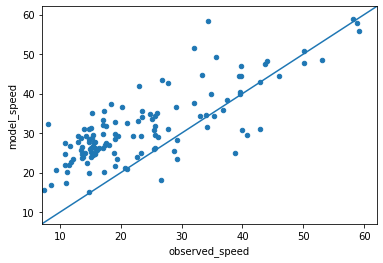

In [51]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
ax = df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [52]:
df[df['tod'] == '16to17'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
865,"SR 304, Burwell to SR 3 - NB",32,8
406,"SR 3, SR 303 to Loxie Eagans - SB",58,34
649,"Bel-Red Road, West Lk Samm to 124th Ave NE - WB",35,15
1045,"SR 410, SR 165 to SR 167 - WB",52,32
703,"Canyon Road, 176th to 72nd - NB",37,18
145,Redmond to Seattle - WB,42,23
1027,"SR 99, S 320th St to SR 518 - NB",36,17
496,"56th Street/Cirque, Bridgeport to Alaska - EB",31,14
163,Redmond to Bellevue - WB,43,27
586,"164th Street, 44th Ave W/168th St to SR 527 - EB",28,11


## Pierce County

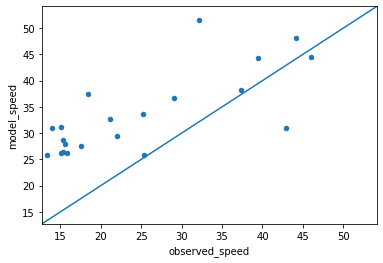

In [53]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county=='Pierce']
ax = df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [54]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
982,"SR 410, SR 165 to SR 167 - WB",52,32
937,"Canyon Road, 176th to 72nd - NB",37,18
892,"56th Street/Cirque, Bridgeport to Alaska - EB",31,14
973,"Wollochet Drive, 40th St NW to SR 16 NB Off-ra...",31,15
964,"Pearl Street, N 51st St to EB SR 16 ramps - SB",29,15
543,"SR 161, SR 18 to 264th St - SB",26,13
910,"74th/72nd/Pioneer, Meridian to Lakewood - WB",28,16
39,Tacoma to Seattle - NB,31,43
928,"176th Street, Spanaway Loop Rd to Meridian - EB",33,21
883,"56th Street/Cirque, Alaska to Bridgeport - WB",27,15


## Other Counties

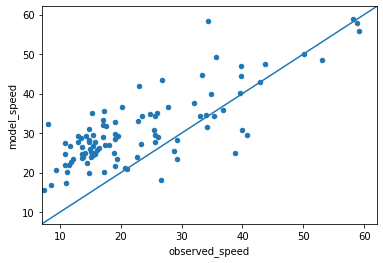

In [55]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county!='Pierce']
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
ax = df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [56]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
631,"SR 304, Burwell to SR 3 - NB",32,8
298,"SR 3, SR 303 to Loxie Eagans - SB",58,34
487,"Bel-Red Road, West Lk Samm to 124th Ave NE - WB",35,15
91,Redmond to Seattle - WB,42,23
784,"SR 99, S 320th St to SR 518 - NB",36,17
109,Redmond to Bellevue - WB,43,27
442,"164th Street, 44th Ave W/168th St to SR 527 - EB",28,11
325,"SR 9, SR 522 to SR 531 - NB",37,20
649,"SR 305, Agate Pass Bridge to SR 3 - WB",33,17
496,"Bel-Red Road, 124th Ave NE to West Lk Samm - EB",29,13
